## Image Classification Using Convolutional Neural Networks - MNIST Dataset

### Install Dependencies

In [0]:
!pip install tensorflow_datasets --user

### Setting Up

In [0]:
try:
  %tensorflow_version 2.x
except:
  pass

from matplotlib import style

import logging
import math
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import urllib3

style.use('ggplot')
tf.get_logger().setLevel(logging.ERROR)
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

TensorFlow 2.x selected.


### Load the MNIST Dataset

In [0]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
print(dataset)
print(metadata)

{'test': <_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>, 'train': <_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}
tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [0]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print("Total training examples : {}".format(num_train_examples))
print("Total testing examples  : {}".format(num_test_examples))

Total training examples : 60000
Total testing examples  : 10000


In [0]:
class_labels = ['Zero', 'One', 'Two', 'Three', 'Four', 
                'Five', 'Six', 'Seven', 'Eight', 'Nine']

for i, ele in enumerate(class_labels):
  print("{} --> {}".format(i, ele))

0 --> Zero
1 --> One
2 --> Two
3 --> Three
4 --> Four
5 --> Five
6 --> Six
7 --> Seven
8 --> Eight
9 --> Nine


### Normalization of Training and Testing Slices

In [0]:
def normalization(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

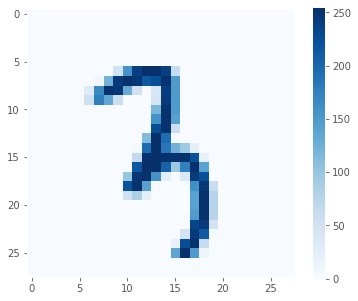

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  47 156 240 254 255 240  60   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   7 122 245 253 248 215 226 253 149   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  31 166 253 249 131  50   0  39 241 14

In [0]:
for train_img, train_lab in train_dataset.take(1):
  break

train_img = train_img.numpy().reshape((28, 28))

plt.figure(figsize=(6, 5))
plt.imshow(train_img, cmap=plt.cm.Blues)
plt.colorbar()
plt.grid(False)
plt.show()

print(train_img)
print(train_img.shape)
print(train_lab)

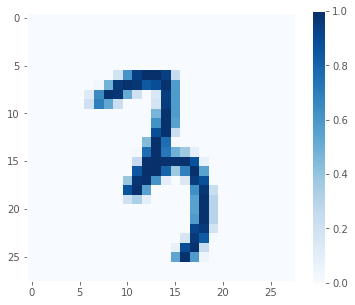

tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.    

In [0]:
train_img, train_lab = normalization(train_img, train_lab)

plt.figure(figsize=(6, 5))
plt.imshow(train_img, cmap=plt.cm.Blues)
plt.colorbar()
plt.grid(False)
plt.show()

print(train_img)
print(train_img.shape)
print(train_lab)

In [0]:
train_dataset = train_dataset.map(normalization)
test_dataset = test_dataset.map(normalization)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

In [0]:
for train_img, train_lab in train_dataset.take(1):
  break

print(train_img[25])
print(train_lab)

for test_img, test_lab in test_dataset.take(1):
  break

print(test_img[2])
print(test_lab)

tf.Tensor(
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.5411765 ]
 [0.99215686]
 [0.5803922 ]
 [0.04705882]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]], shape=(28, 1), dtype=float32)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.14117648]
 [0.7176471 ]
 [0.69803923]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]], shape=(28, 1), dtype=float32)
tf.Tensor(6, shape=(), dtype=int64)


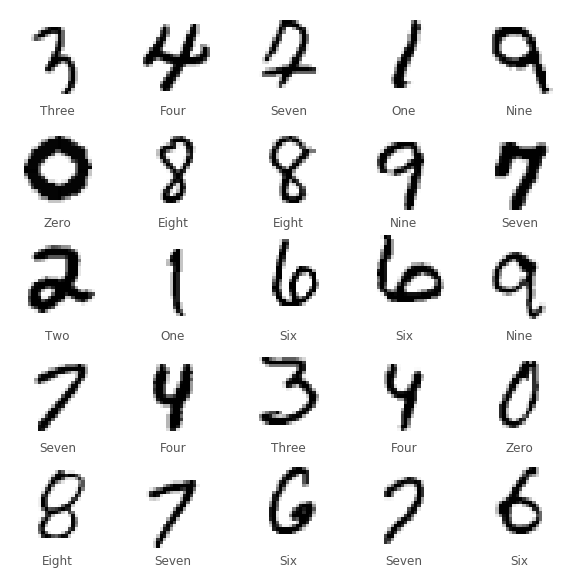

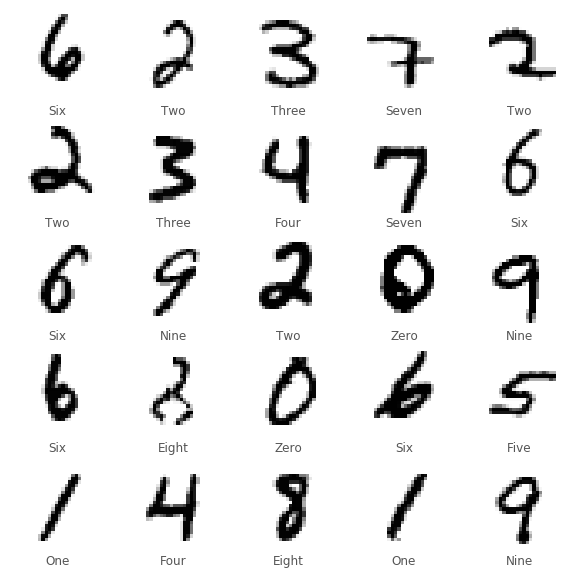

In [0]:
plt.figure(figsize=(10, 10))

i = 0
for train_img, train_lab in train_dataset.take(25):
  train_img = train_img.numpy().reshape((28, 28))
  
  plt.subplot(5, 5, i+1)
  plt.imshow(train_img, cmap=plt.cm.binary)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_labels[train_lab])
  i += 1

plt.show()

print("\n\n\n")

plt.figure(figsize=(10, 10))

i = 0
for test_img, test_lab in test_dataset.take(25):
  test_img = test_img.numpy().reshape((28, 28))

  plt.subplot(5, 5, i+1)
  plt.imshow(test_img, cmap=plt.cm.binary)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_labels[test_lab])
  i += 1

plt.show()

In [0]:
for train_img, train_lab in train_dataset.take(1):
  break

input_shape = tuple(train_img.shape)
input_shape

(28, 28, 1)

### Build the Model

In [0]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=(3, 3), 
                         padding='same', 
                         activation=tf.nn.relu, 
                         input_shape=input_shape),
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2), 
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=(3, 3), 
                         padding='same', 
                         activation=tf.nn.relu), 
  tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=128, activation=tf.nn.relu), 
  tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

### Compile the Model

In [0]:
model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [0]:
for train_img, train_lab in train_dataset.take(1):
  break

print(train_img.shape)
print(train_lab.shape)

(32, 28, 28, 1)
(32,)


### Fit the Model

In [0]:
model_1.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1204 - accuracy: 0.9621
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0440 - accuracy: 0.9867
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0259 - accuracy: 0.9916
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0201 - accuracy: 0.9935
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0159 - accuracy: 0.9950


### Evaluate the Model

In [0]:
test_loss, test_accuracy = model_1.evaluate(test_dataset, 
                                            steps=math.ceil(num_test_examples/BATCH_SIZE))

print("Accuracy of the Model on Test dataset : {}".format(test_accuracy))

313/313 [==============================] - 2s 7ms/step - loss: 0.0380 - accuracy: 0.9894
Accuracy of the Model on Test dataset : 0.9894000291824341


### Make the Predictions

In [0]:
for test_img, test_lab in test_dataset.take(1):
  break

print(test_img.shape)
test_img = test_img.numpy()
print(test_img.shape)

(32, 28, 28, 1)
(32, 28, 28, 1)


In [0]:
predict_exp_1 = model_1.predict(test_img)

In [0]:
predict_exp_1

array([[1.98806631e-11, 4.61912223e-15, 4.60788694e-18, 5.99181912e-20,
        3.56739815e-09, 5.25684856e-13, 1.00000000e+00, 7.86022432e-19,
        1.19890932e-14, 2.45079216e-16],
       [5.02713284e-08, 1.20550070e-10, 9.99970436e-01, 4.60671998e-08,
        1.29997191e-09, 2.95896730e-14, 9.29335493e-13, 5.02913235e-06,
        2.45919473e-05, 1.12238052e-09],
       [1.17223771e-19, 1.16774613e-14, 4.36873541e-12, 1.00000000e+00,
        1.28380993e-15, 5.04913576e-11, 1.91707146e-15, 3.36003975e-10,
        3.40725954e-11, 1.62336702e-12],
       [9.39370543e-12, 1.57561561e-10, 1.41025779e-07, 1.25225290e-06,
        1.44794521e-09, 7.94577484e-14, 1.54971433e-15, 9.99998450e-01,
        3.34644340e-10, 6.22799163e-08],
       [1.39412109e-07, 1.10225011e-08, 9.99999046e-01, 6.43332143e-08,
        7.07702722e-13, 2.68928949e-13, 1.97171207e-12, 7.54820690e-07,
        4.53165608e-13, 4.17155407e-11],
       [3.10173707e-14, 4.47027311e-12, 1.00000000e+00, 7.62970243e-12,
   

In [0]:
for test_img, test_lab in test_dataset.take(1):
  break

In [0]:
predict_exp_2 = model_1.predict(test_img)

In [0]:
predict_exp_2

array([[1.98806631e-11, 4.61912223e-15, 4.60788694e-18, 5.99181912e-20,
        3.56739815e-09, 5.25684856e-13, 1.00000000e+00, 7.86022432e-19,
        1.19890932e-14, 2.45079216e-16],
       [5.02713284e-08, 1.20550070e-10, 9.99970436e-01, 4.60671998e-08,
        1.29997191e-09, 2.95896730e-14, 9.29335493e-13, 5.02913235e-06,
        2.45919473e-05, 1.12238052e-09],
       [1.17223771e-19, 1.16774613e-14, 4.36873541e-12, 1.00000000e+00,
        1.28380993e-15, 5.04913576e-11, 1.91707146e-15, 3.36003975e-10,
        3.40725954e-11, 1.62336702e-12],
       [9.39370543e-12, 1.57561561e-10, 1.41025779e-07, 1.25225290e-06,
        1.44794521e-09, 7.94577484e-14, 1.54971433e-15, 9.99998450e-01,
        3.34644340e-10, 6.22799163e-08],
       [1.39412109e-07, 1.10225011e-08, 9.99999046e-01, 6.43332143e-08,
        7.07702722e-13, 2.68928949e-13, 1.97171207e-12, 7.54820690e-07,
        4.53165608e-13, 4.17155407e-11],
       [3.10173707e-14, 4.47027311e-12, 1.00000000e+00, 7.62970243e-12,
   

In [0]:
for test_img, test_lab in test_dataset.take(1):
  test_img = test_img.numpy()
  test_lab = test_lab.numpy()
  predictions = model_1.predict(test_img)

In [0]:
predictions

array([[1.98806631e-11, 4.61912223e-15, 4.60788694e-18, 5.99181912e-20,
        3.56739815e-09, 5.25684856e-13, 1.00000000e+00, 7.86022432e-19,
        1.19890932e-14, 2.45079216e-16],
       [5.02713284e-08, 1.20550070e-10, 9.99970436e-01, 4.60671998e-08,
        1.29997191e-09, 2.95896730e-14, 9.29335493e-13, 5.02913235e-06,
        2.45919473e-05, 1.12238052e-09],
       [1.17223771e-19, 1.16774613e-14, 4.36873541e-12, 1.00000000e+00,
        1.28380993e-15, 5.04913576e-11, 1.91707146e-15, 3.36003975e-10,
        3.40725954e-11, 1.62336702e-12],
       [9.39370543e-12, 1.57561561e-10, 1.41025779e-07, 1.25225290e-06,
        1.44794521e-09, 7.94577484e-14, 1.54971433e-15, 9.99998450e-01,
        3.34644340e-10, 6.22799163e-08],
       [1.39412109e-07, 1.10225011e-08, 9.99999046e-01, 6.43332143e-08,
        7.07702722e-13, 2.68928949e-13, 1.97171207e-12, 7.54820690e-07,
        4.53165608e-13, 4.17155407e-11],
       [3.10173707e-14, 4.47027311e-12, 1.00000000e+00, 7.62970243e-12,
   

In [0]:
for i in range(0, BATCH_SIZE, 1):
  if np.argmax(predictions[i]) == test_lab[i]:
    print("Num : {} -->  {}  --> {} --> Confidence : {}".format(
        i, True, class_labels[np.argmax(predictions[i])], 100*predictions[i][np.argmax(predictions[i])]))
  else:
    print("Num : {} -- > {}".format(i, False))

Num : 0 -->  True  --> Six --> Confidence : 100.0
Num : 1 -->  True  --> Two --> Confidence : 99.99704360961914
Num : 2 -->  True  --> Three --> Confidence : 100.0
Num : 3 -->  True  --> Seven --> Confidence : 99.99984502792358
Num : 4 -->  True  --> Two --> Confidence : 99.99990463256836
Num : 5 -->  True  --> Two --> Confidence : 100.0
Num : 6 -->  True  --> Three --> Confidence : 100.0
Num : 7 -->  True  --> Four --> Confidence : 100.0
Num : 8 -->  True  --> Seven --> Confidence : 100.0
Num : 9 -->  True  --> Six --> Confidence : 99.9998688697815
Num : 10 -->  True  --> Six --> Confidence : 99.85051155090332
Num : 11 -->  True  --> Nine --> Confidence : 99.7104823589325
Num : 12 -->  True  --> Two --> Confidence : 100.0
Num : 13 -->  True  --> Zero --> Confidence : 100.0
Num : 14 -->  True  --> Nine --> Confidence : 99.99998807907104
Num : 15 -->  True  --> Six --> Confidence : 100.0
Num : 16 -->  True  --> Eight --> Confidence : 77.31260657310486
Num : 17 -->  True  --> Zero --> Co

### Beautiful plots

In [0]:
def plot_the_image(index_img, prediction_array, actual_labels, images_tested):
  prediction_array = prediction_array[index_img]
  actual_label = actual_labels[index_img]
  images_testing = images_tested[index_img]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(images_testing[..., 0], cmap=plt.cm.bone_r)

  prediction_label = np.argmax(prediction_array)

  if prediction_label == actual_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:.2f}%  ({})".format(class_labels[prediction_label], 
                                       100*np.max(prediction_array), 
                                       class_labels[actual_label]), color=color)

def plot_the_predicted_array(index_img, prediction_array, actual_labels):
  prediction_array = prediction_array[index_img]
  actual_label = actual_labels[index_img]

  plt.grid(False)
  plt.xticks(range(10))
  this_plot = plt.bar(range(10), prediction_array, color='#777777')
  plt.ylim([0, 1])

  this_plot[np.argmax(prediction_array)].set_color('red')
  this_plot[actual_label].set_color('green')

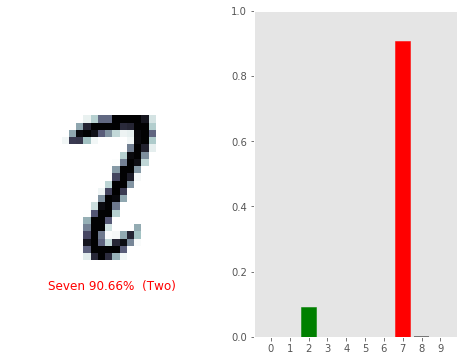

In [0]:
index_img = 30
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plot_the_image(index_img=index_img, 
               prediction_array=predictions, 
               actual_labels=test_lab, 
               images_tested=test_img)

plt.subplot(1, 2, 2)
plot_the_predicted_array(index_img=index_img, 
                         prediction_array=predictions, 
                         actual_labels=test_lab)
plt.show()

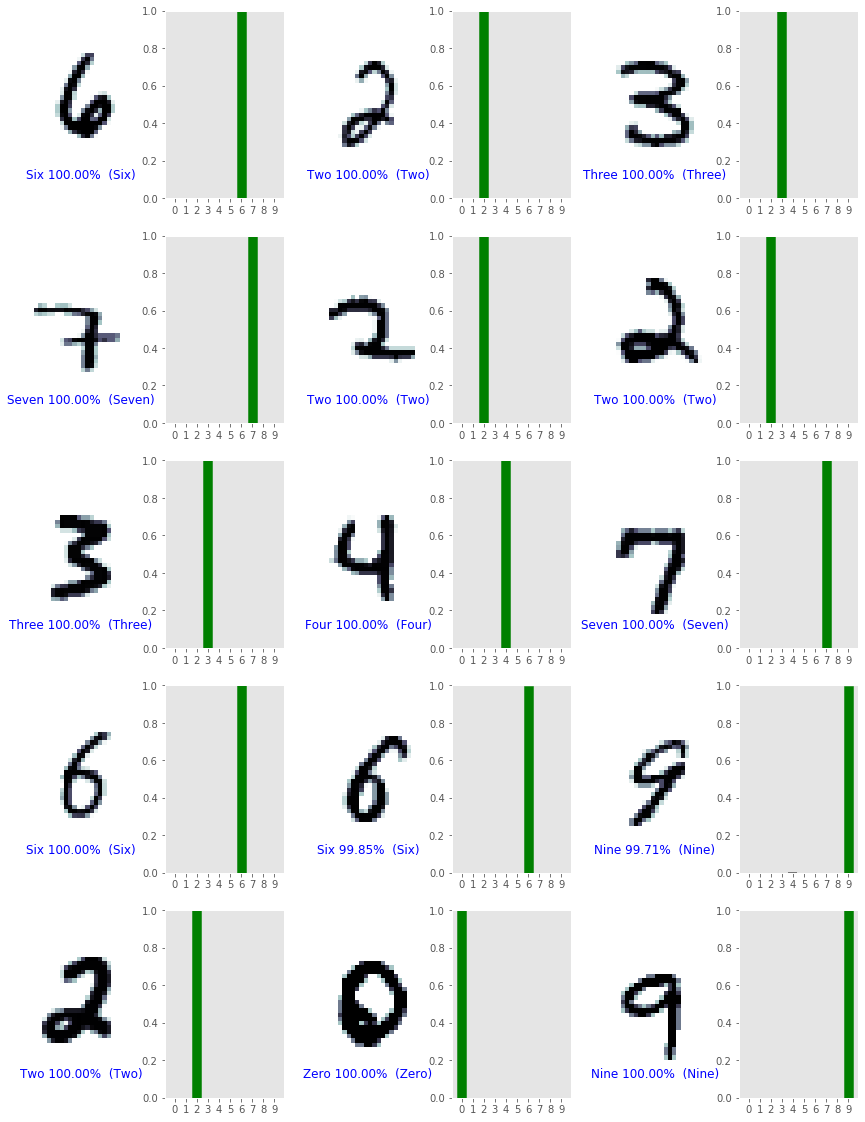

In [0]:
num_rows = 5
num_cols = 3
total_grid = num_rows * num_cols

plt.figure(figsize=((2*2+1)*num_cols, (2*2)*num_rows))

for index_img in range(0, total_grid, 1):
  plt.subplot(num_rows, 2*num_cols, 2*index_img+1)
  plot_the_image(index_img=index_img, 
                 prediction_array=predictions, 
                 actual_labels=test_lab, 
                 images_tested=test_img)
  plt.subplot(num_rows, 2*num_cols, 2*index_img+2)
  plot_the_predicted_array(index_img=index_img, 
                           prediction_array=predictions, 
                           actual_labels=test_lab)
plt.show()

In [0]:
ind = 0

image = test_img[ind]
print(image.shape)

image = np.array([image])
print(image.shape)

(28, 28, 1)
(1, 28, 28, 1)


In [0]:
predict_single = model_1.predict(image)

In [0]:
predict_single

array([[1.9880701e-11, 4.6191222e-15, 4.6079221e-18, 5.9918650e-20,
        3.5673982e-09, 5.2568383e-13, 1.0000000e+00, 7.8602243e-19,
        1.1989138e-14, 2.4507922e-16]], dtype=float32)

True --> Six --> Confidence --> 100.0



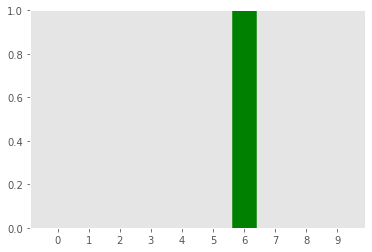

In [0]:
if np.argmax(predict_single) == test_lab[ind]:
  print("{} --> {} --> Confidence --> {}\n".format(
      True, class_labels[np.argmax(predict_single)], 100*predict_single[ind][np.argmax(predict_single[ind])]))
  plot_the_predicted_array(index_img=ind, 
                           prediction_array=predict_single, 
                           actual_labels=test_lab)
else:
  print(False)